In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Time Series Plot

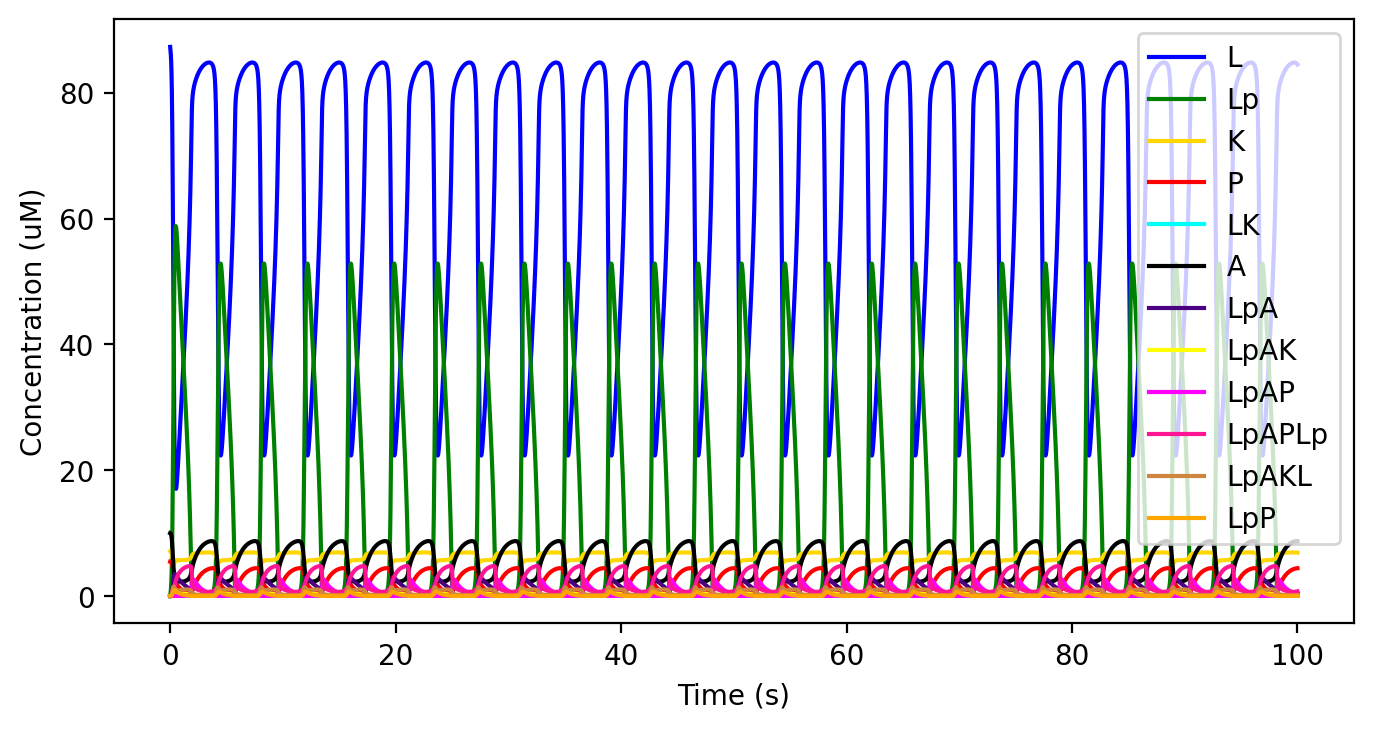

In [17]:
##'ka1': 0.03791999300713553, 'kb1': 97.82403936369272, 'kcat1': 277.346311110198,
# 'ka2': 0.7163743434133126, 'kb2': 32.47470589751822, 'ka3': 7.559407489840667, 'kb3': 223.36133248956713, 
# 'ka4': 0.8199153260341503, 'kb4': 1.8864353860273186, 'ka7': 0.9946959796263228, 'kb7': 90.04601085463732, 
# 'kcat7': 70.73363511534804, 'V': 0.07994067550020652, 'VA': 1.5, 'sigma': 0.001, 'L': 87.30083542079618, 
# 'Lp': 0.0, 'K': 7.111613238604031, 'P': 5.451528942232038, 'LK': 0.0, 'A': 10, 'LpA': 0.0, 'LpAK': 0.0, 
# 'LpAP': 0.0, 'LpAPLp': 0.0, 'LpAKL': 0.0, 'LpP': 0.0


# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,100,num=10000)


params = [0.03791999300713553, 97.82403936369272, 277.346311110198, 0.7163743434133126, 
        32.47470589751822, 7.559407489840667, 223.36133248956713, 0.8199153260341503, 
        1.8864353860273186, 0.9946959796263228, 90.04601085463732, 70.73363511534804, 0.07994067550020652, 1.5, 
        0.001, 87.30083542079618, 0.0, 7.111613238604031, 5.451528942232038, 0.0, 10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
initial_populations = params[15:]
# ka2 = 0.2
# kb2 = 0.1

# ka3 = 0.6
# kb3 = 0.1 

# ka4 = 0.2
# kb4 = 0.1
# kcat4 = 1

# ka5 = 0.3
# kb5 = 0.1
# kcat5 = 2

# ka6 = 0.4
# kb6 = 0.2

# ka7 = 0.6
# kb7 = 0.2

# ka8 = 0.4
# kb8 = 0.1
# kcat8 = 5

# Km4 = (kb4 + kcat4)/ka4
# Km5 = (kb5 + kcat5)/ka5
# Km8 = (kb8 + kcat8)/kb8

# K = 100


# params = [ka1,kb1,kcat1,ka2,kb2,ka3,kb3,ka4,kb4,ka5,kb5,kcat5]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(t, current_counts, params):

    V = params[12]
    VA = params[13]
    #A = V/VA
    sigma = params[14]
    #y1 = VA/(2*sigma)


    L = current_counts[0] 
    Lp = current_counts[1]
    K = current_counts[2]
    P = current_counts[3]
    LK = current_counts[4]
    A = current_counts[5]
    LpA = current_counts[6]
    LpAK = current_counts[7]
    LpAP = current_counts[8]
    LpAPLp = current_counts[9]
    LpAKL = current_counts[10]
    LpP = current_counts[11]

    ka1 = params[0]
    kb1 = params[1]
    kcat1 = params[2]

    ka2 = params[3]
    kb2 = params[4]

    ka3 = params[5]
    kb3 = params[6]

    ka4 = params[7]
    kb4 = params[8]

    ka7 = params[9]
    kb7 = params[10]
    kcat7 = params[11]

    ka5 = params[9]
    kb5 = params[10]
    kcat5 = params[11]

    ka6 = params[0]
    kb6 = params[1]
    kcat6 = params[2]



    dL = (kb1*LK) - (ka1*L*K) + (kcat5*LpAPLp) + (kb6*LpAKL) - ((VA/(2*sigma))*ka6*LpAK*L) + (kcat7*LpP)
    dLp = (kcat1*LK) + (kb2*LpA) - (ka2*Lp*A) + (kb5*LpAPLp) - ((VA/(2*sigma))*ka5*Lp*LpAP) + (kcat6*LpAKL) - (ka7*Lp*P) + (kb7*LpP)
    dK = (kb1*LK) - (ka1*L*K) + (kcat1*LK) + (kb3*LpAK) - (ka3*LpA*K)
    dP = (kb4*LpAP) - (ka4*LpA*P) - (ka7*Lp*P) + (kb7*LpP) + (kcat7*LpP)
    dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)
    dA = (kb2*LpA) - (ka2*Lp*A)
    dLpA = (ka2*Lp*A) - (kb2*LpA) + (kb3*LpAK) - (ka3*LpA*K) + (kb4*LpAP) - (ka4*LpA*P)
    dLpAK = (ka3*LpA*K) - (kb3*LpAK) + (kb6*LpAKL) - ((VA/(2*sigma))*ka6*LpAK*L) + (kcat6*LpAKL)
    dLpAP = (ka4*LpA*P) - (kb4*LpAP) + (kb5*LpAPLp) - ((VA/(2*sigma))*ka5*LpAP*Lp) + (kcat5*LpAPLp)
    dLpAPLp = ((VA/(2*sigma))*ka5*LpAP*Lp) - (kb5*LpAPLp) - (kcat5*LpAPLp)
    dLpAKL = ((VA/(2*sigma))*ka6*LpAK*L) - (kb6*LpAKL) - (kcat6*LpAKL)
    dLpP = (ka7*Lp*P) - (kb7*LpP) - (kcat7*LpP)

    return([dL, dLp, dK, dP, dLK, dA, dLpA, dLpAK, dLpAP, dLpAPLp, dLpAKL,dLpP])	

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
#solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

sol = solve_ivp(fun=calculate_current_population_change_rates,method='BDF', t_span=(0, 100), 
            y0=initial_populations, t_eval=t, args=(params,),rtol=1e-6, atol=1e-9)

t = sol.t
solutions = sol.y

#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[0,:], color="b", label = 'L')
plt.plot(t,solutions[1,:], color="g", label = 'Lp')
plt.plot(t,solutions[2,:], color="gold", label = 'K')
plt.plot(t,solutions[3,:], color="r", label = 'P')
plt.plot(t,solutions[4,:], color="cyan", label = 'LK')
plt.plot(t,solutions[5,:], color="black", label = 'A')
plt.plot(t,solutions[6,:], color="indigo", label = 'LpA')
plt.plot(t,solutions[7,:], color="yellow", label = 'LpAK')
plt.plot(t,solutions[8,:], color="magenta", label = 'LpAP')
plt.plot(t,solutions[9,:], color="deeppink", label = 'LpAPLp')
plt.plot(t,solutions[10,:], color="peru", label = 'LpAKL')
plt.plot(t,solutions[11,:], color="orange", label = 'LpP')

plt.xlabel('Time (s)')
plt.ylabel('Concentration (uM)')
plt.legend()

plt.show()



In [32]:
parameter_values = {  "ka1": {"min": 1000/1e6, "max": 1e6/1e6},  
            "kb1": {"min": 0, "max": 100},             				        
            "kcat1": {"min": 0, "max": 500},         
            "ka2": {"min": 1000/1e6, "max": 1e6/1e6},         
            "kb2": {"min": 0, "max": 1000}, 
            "ka3": {"min": 1e3/1e6, "max":1e8/1e6}, 
            "kb3": {"min": 0, "max":500},
            "ka4": {"min": 1e3/1e6, "max":1e6/1e6},
            "kb4": {"min": 0, "max": 100},  
            "ka5": {"min": 1e3/1e6, "max": 1e6/1e6}, 
            "kb5": {"min": 0, "max": 1000}, 
            "kcat5": {"min": 0, "max": 200},
            "V": {"min": 2600, "max": 2600},
            "VA": {"min": 0.5, "max": 2},
            "sigma": {"min": 0.001, "max": 0.001},
            "L": {"min": 1, "max": 1e2},  
            "Lp": {"min": 0, "max": 0}, 
            "K": {"min": 0.01, "max": 0.1},
            "P": {"min": 0.01, "max": 0.1},
            "LK": {"min": 0, "max": 0}, 
            "A": {"min": .1, "max": 10}, 
            "LpA": {"min": 0, "max": 0},
            "LpAK": {"min": 0, "max": 0}, 
            "LpAP": {"min": 0, "max": 0}, 	
            "LpAPLp": {"min": 0, "max": 0},
            "LpAKL": {"min": 0, "max": 0},
            "LpP": {"min": 0, "max": 0},
            }   	

filename =  os.path.join(".", "SIMPLE2_oscillatorCostTwo")  
print(filename)   
model = Oscillator(parameter_values, np.array(["ka1", "kb1", "kcat1", "ka2", "kb2", "ka3", "kb3", "ka4","kb4","ka5","kb5","kcat5","V","VA","sigma","L","Lp","K","P","LK","A","LpA","LpAK","LpAP","LpAPLp","LpAKL","LpP"]), np.array(["L","Lp","K","P",0,"A",0,0,0,0,0,0]), mode=1)  
#solver = Solver(model)         
#solver.run(filename) 

./SIMPLE2_oscillatorCostTwo
